In [3]:
import numpy as np
import matplotlib.pyplot as plt
from maplot import map_plot_surface, map_plot_surface_sub

inPath = "H:\\XCO2\\OCO2_L2_Lite_FP_11.1r\\LAT_year_wsj\\"
outPath = "H:\\XCO2\\OCO2_L2_Lite_FP_11.1r\\LAT_year_bilinear\\"

china = np.load("china_area.npy") > 0.0

H:\preprocessing_code\XCO2\OCO-2\OCO2_L2_Lite_FP_11.1r\maplot.py:93: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  mapPlot = Map.pcolor(x, y, m, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
H:\preprocessing_code\XCO2\OCO-2\OCO2_L2_Lite_FP_11.1r\maplot.py:93: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  mapPlot = Map.pcolor(x, y, m, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
H:\preprocessing_code\XCO2\OCO-2\OCO2_L2_Lite_FP_11.1r\maplot.py:93: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectl

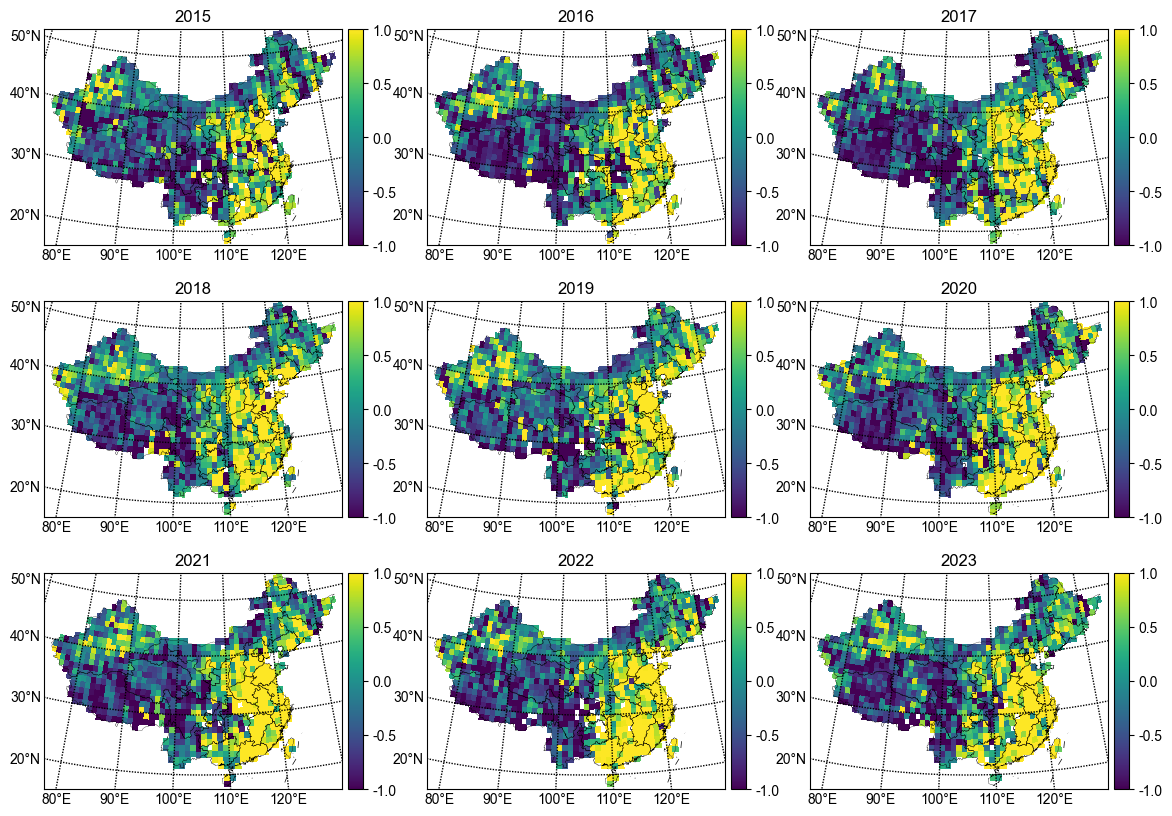

In [4]:
plt.figure(figsize=(14, 10))
sub = 331
for year in range(2015, 2024):
    plt.subplot(sub)
    temp = np.load(inPath + f"OCO-2_{year}_lat_world_ano.npy")
    temp[~china] = np.NaN
    map_plot_surface_sub(temp, "viridis", -1.0, 1.0, f"{year}")
    sub += 1

plt.show()

In [5]:
for year in range(2015, 2024):
    data = np.load(inPath + f"OCO-2_{year}_lat_world_ano.npy")
    print(f"Process {year}:")

    nulls = np.argwhere(np.logical_and(np.isnan(data), china))  # shape: (n, 2)，n为空缺值数量，两个数为坐标

    for x, y in nulls:
        data[x, y] = np.nanmean(data[(x,x,x+1,x-1), (y+1,y-1,y,y)])
        print(f"Cell at {y-179.5}°E{x-89.5}°N is filled with {data[x, y]}")

    np.save(outPath + f"MappingXCO2_{year}.npy", data)
    print("Process completed.\n")

Process 2015:
Cell at 111.5°E23.5°N is filled with 1.5372416044910402
Cell at 106.5°E24.5°N is filled with 0.1869285822179204
Cell at 112.5°E24.5°N is filled with 1.6571150627155014
Cell at 110.5°E27.5°N is filled with -0.11275146052467895
Cell at 113.5°E27.5°N is filled with 0.6119265429650224
Cell at 105.5°E28.5°N is filled with -0.43314263718607127
Cell at 108.5°E28.5°N is filled with -0.33605717619266917
Cell at 104.5°E30.5°N is filled with -2.3720520300622616
Cell at 104.5°E31.5°N is filled with -1.2063715746570114
Cell at 115.5°E31.5°N is filled with 1.2555024046090317
Cell at 111.5°E32.5°N is filled with 0.5842138973029212
Cell at 119.5°E33.5°N is filled with 1.2702769982389348
Cell at 133.5°E47.5°N is filled with -0.04771165296351487
Process completed.

Process 2016:
Cell at 101.5°E25.5°N is filled with -0.30975472165608176
Cell at 112.5°E25.5°N is filled with 1.4536754883511478
Cell at 113.5°E27.5°N is filled with 0.5438132282803387
Cell at 105.5°E28.5°N is filled with 0.61492

H:\preprocessing_code\XCO2\OCO-2\OCO2_L2_Lite_FP_11.1r\maplot.py:93: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  mapPlot = Map.pcolor(x, y, m, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
H:\preprocessing_code\XCO2\OCO-2\OCO2_L2_Lite_FP_11.1r\maplot.py:93: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  mapPlot = Map.pcolor(x, y, m, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
H:\preprocessing_code\XCO2\OCO-2\OCO2_L2_Lite_FP_11.1r\maplot.py:93: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectl

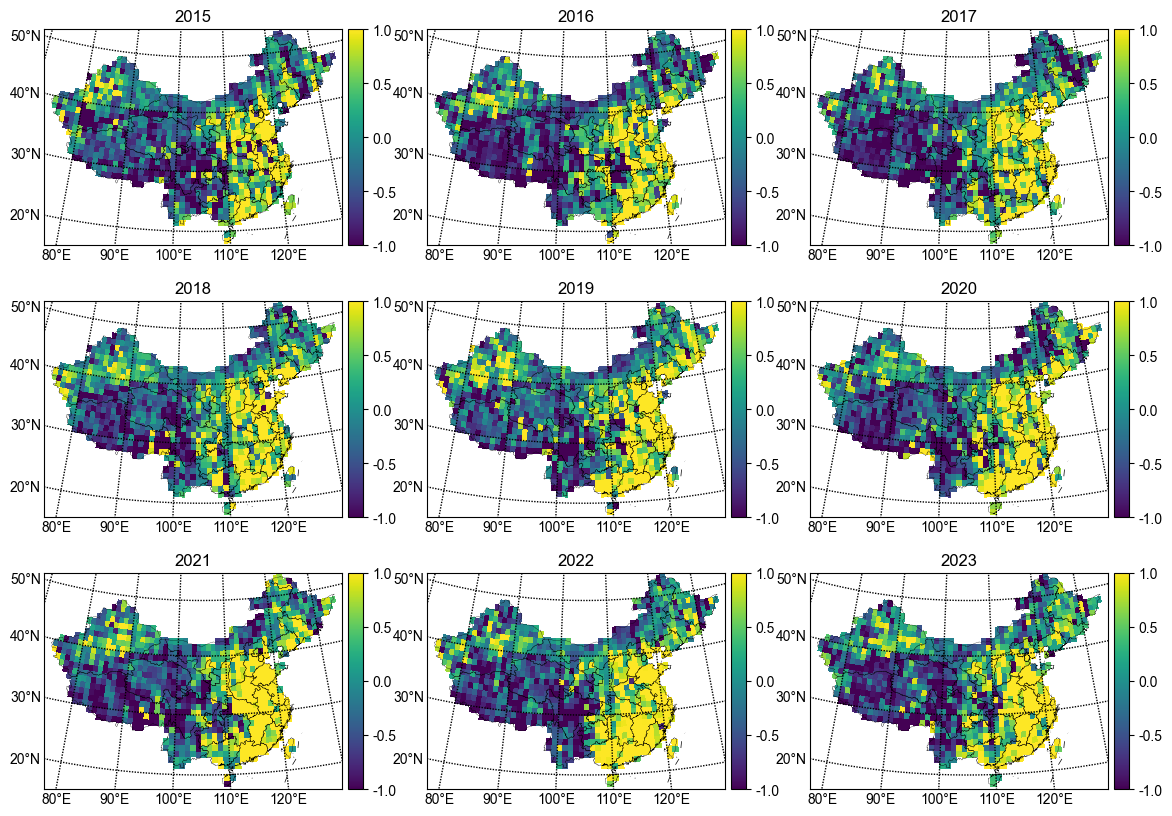

In [7]:
plt.figure(figsize=(14, 10))
sub = 331
for year in range(2015, 2024):
    plt.subplot(sub)
    temp = np.load(outPath + f"MappingXCO2_{year}.npy")
    temp[~china] = np.NaN
    map_plot_surface_sub(temp, "viridis", -1.0, 1.0, f"{year}")
    sub += 1

plt.show()